In [1]:
import numpy as np
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.one_d_sax import OneDSAX

In [2]:
# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)


# only select columns with data ('signal') and ignore class labels ('pattern_main_id')
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]
df_norm

,signal,signal
0,2.223633,1.879365
1,2.058567,1.733153
2,1.849589,1.579823
3,1.642328,1.402389
4,1.438219,1.257130
...,...,...
123,1.345195,1.162620
124,1.547908,1.314745
125,1.760490,1.500432
126,1.970141,1.657326


In [3]:
alphabet_size = 9
alphabet_size_slope = 3

sax = SAX(alphabet_size)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size_avg=alphabet_size, alphabet_size_slope=alphabet_size_slope)

sax_variant = sax

In [4]:
sax.compute_compression_ratio_percentage(df_norm.shape[0], 100)

4.8828125

In [5]:
from collections import defaultdict
import math


num_segments = round(df_norm.shape[0] / 4)
alphabet_sizes = [4, 9, 16, 25]

compression = defaultdict(list)
for alphabet_size in alphabet_sizes:
    sax_variants = []
    sax = SAX(alphabet_size)
    a_sax = AdaptiveSAX(alphabet_size)
    one_d_sax = OneDSAX(alphabet_size, alphabet_size)
    e_sax = ExtendedSAX(alphabet_size)
    sax_variants.extend([sax, a_sax, one_d_sax, e_sax])
    lst = []
    for sax_variant in sax_variants:
        compression[sax_variant.name].append(sax_variant.compute_compression_ratio_percentage(df_norm.shape[0], num_segments))

In [6]:
compression

defaultdict(list,
            {'SAX': [0.78125, 1.5625, 1.5625, 1.953125],
             'aSAX': [0.78125, 1.5625, 1.5625, 1.953125],
             '1d-SAX': [1.5625, 3.125, 3.125, 3.90625],
             'eSAX': [2.34375, 4.6875, 4.6875, 5.859375]})

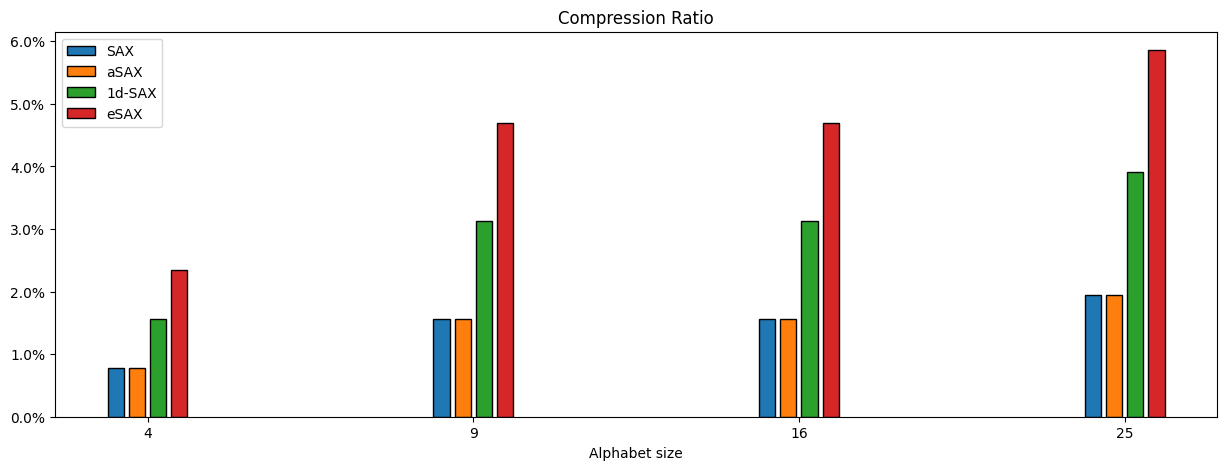

In [7]:
from discretization.sax.graphics import plot_compression_ratio_comparison


plot_compression_ratio_comparison(compression, alphabet_sizes)